# Part II - FordGo Bike Investigation
## by Sarumi Abdulkarim

## Investigation Overview

> 
> Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose. Finding the bike usage pattern and customer habit features from the 12-month ride trips data for 2018 is the main goal of this research and visualization study.

## Dataset Overview

> The FordGo Bike dataset uses data collected through the month of February,2019. There were approximately 183,412 bike rides collected. This dataset can be gotten in CSV format <a href=https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv>here</a>.The data below has been wrangled and cleaned to produce the visualizations below, which will help with exploration analysis and reveal usage patterns and rider characteristics.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# style for the visuals
sb.set_style('whitegrid')

In [2]:
# load in the dataset into a pandas dataframe
ford_polished=pd.read_csv('fordgobike_master.csv')
base_color = sb.color_palette()[0]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Ford GoBike System User by User Type and Gender

> From these Gender Image, It shows that majority of the users are Male which is 3 times that of the females. This data also includes other genders in the 21st century. We have already depicted that the system is used by people in the workforce, So why is the system male dominated? Is it because of better athleticism in men? or because of the male dominance in the workforce today?
>
> From the User Type Image, Subscribers of the system make use of the Bikes more than the Users. Could this be because of constant registration, How hard it is to get a bike as a user or the response time of the company to regular users?

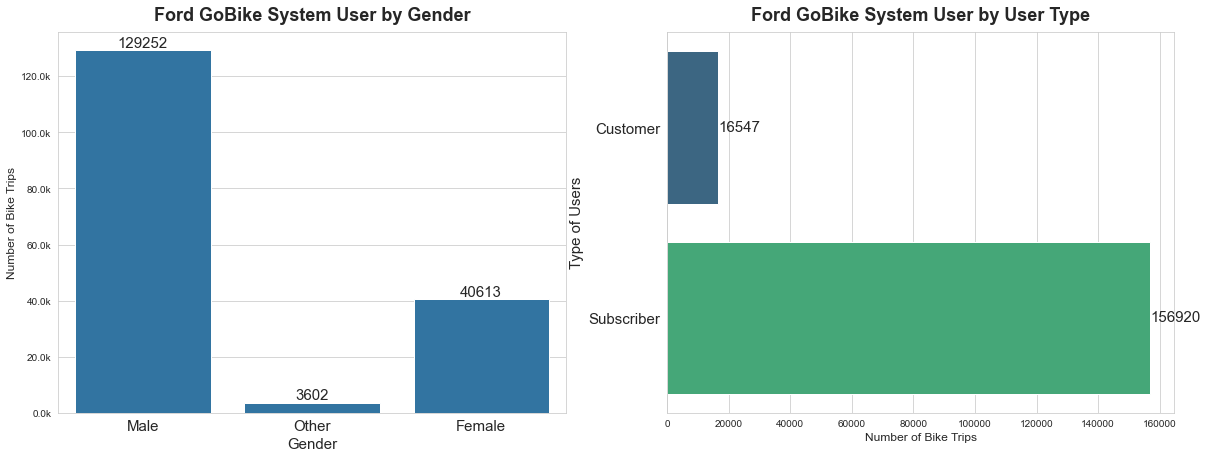

In [3]:
plt.figure(figsize=[20,7])

plt.subplot(1,2,1)
ax= sb.countplot(data=ford_polished,x='member_gender',color=base_color)
ax.bar_label(ax.containers[0],label_type='edge',fontsize=15);
y_ticks = np.arange(0,140000,20000)
y_labels = ['{0}k'.format(v/1000) for v in y_ticks]
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Number of Bike Trips',fontsize=12)
plt.xticks(fontsize=15,rotation=0)
plt.yticks(y_ticks,y_labels)
plt.title('Ford GoBike System User by Gender',fontsize=18,fontweight='semibold',y=1.015);

plt.subplot(1,2,2)
g = sb.countplot(data=ford_polished,y='user_type',color=base_color,palette='viridis')
g.bar_label(g.containers[0],fontsize=15)
plt.xlabel('Number of Bike Trips',fontsize=12)
plt.ylabel('Type of Users',fontsize=15)
plt.yticks(fontsize=15)
plt.title('Ford GoBike System User by User Type',fontsize=18,fontweight='semibold',y=1.015);

## Age of Users for every bike trip

> From this image, The data is skewed to the right and it also stops at age 67 due to the outliers after such age. Majority of the users are mainly between 25 to 40 years of age and this is the average age of people in the workforce. This further confirms the assumption of the Usage of these bikes in the workforce of San Francisco. We can then further ask questions like Are they used for exercise in the morning or evening?

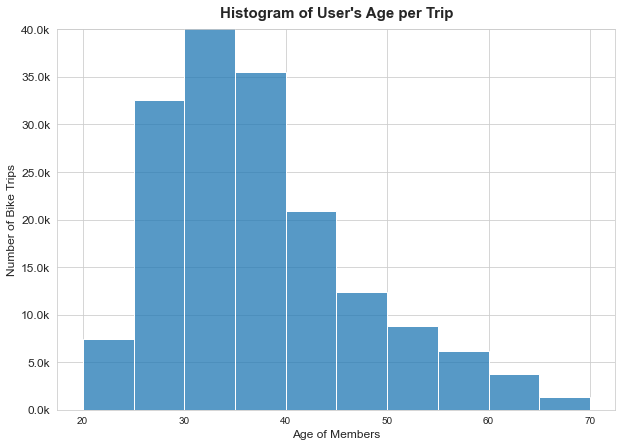

In [4]:
plt.figure(figsize=[10,7])

bins = np.arange(20,ford_polished['member_age'].max()+5,5)
y_ticks = np.arange(0,45000,5000)
y_labels = ['{0}k'.format(v/1000) for v in y_ticks]
sb.histplot(data=ford_polished,x='member_age',bins=bins)
plt.xlabel('Age of Members',fontsize=12)
plt.ylabel('Number of Bike Trips',fontsize=12)
plt.yticks(y_ticks,y_labels,fontsize=12)
plt.title('Histogram of User\'s Age per Trip',fontsize=15,fontweight='semibold',y=1.015)
plt.ylim(top=40000);

## Start Time and Distance Covered During Bike Trips

>From the figures , The times when the trips start are concentrated mainly in between 8-9am and 4-6pm. Most people in the workforce work from 9-5pm. This shows that majority of the subscribers or Users use this bike to get to work or leave their workplace. The second figure shows the distance covered by the users. The histogram is unimodal and skewed to the right. Most users do not use more than 2km on the bike before ending the trip.

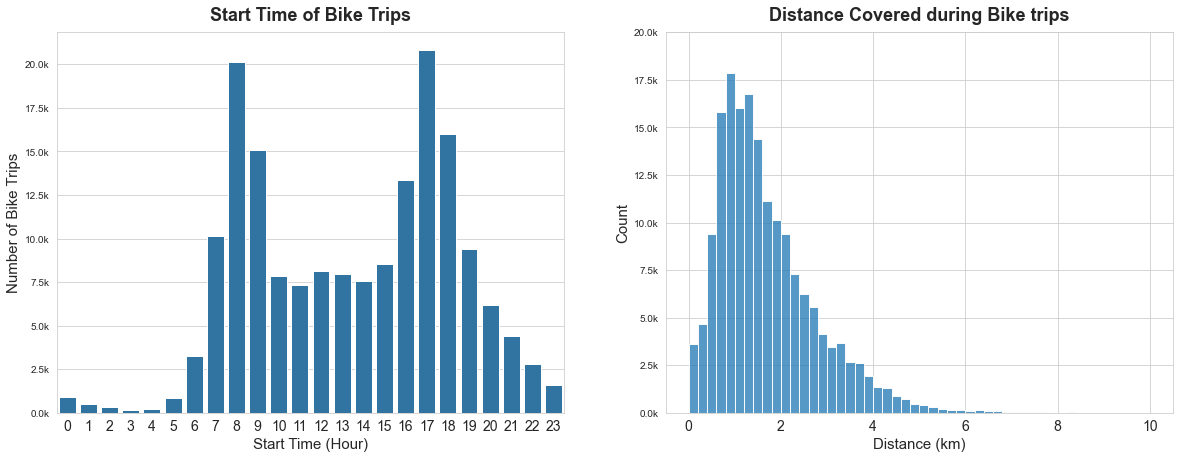

In [5]:
plt.figure(figsize=[20,7])


plt.subplot(1,2,1)
sb.countplot(data=ford_polished,x='start_time_hour',color=base_color)
y_ticks = np.arange(0,22500,2500)
y_labels = ['{0}k'.format(v/1000) for v in y_ticks]
plt.xlabel('Start Time (Hour)',fontsize=15)
plt.ylabel('Number of Bike Trips',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(y_ticks,y_labels)
plt.title('Start Time of Bike Trips',fontsize=18,fontweight='semibold',y=1.015);


plt.subplot(1,2,2)
bins = np.arange(0,10+0.2,0.2)
sb.histplot(data=ford_polished,x='distance_km',bins=bins)
plt.xlabel('Distance (km)',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(y_ticks,y_labels)
plt.title('Distance Covered during Bike trips',fontsize=18,fontweight='semibold',y=1.015);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Èach distribution has shown what the dataset entails. There have been a few outliers in the data but they were taking care of by reducing the limits of the plots affected by these outliers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Nothing seems out of the normal expectations for a bike sharing system in a major city. So far, the data reveals that adults in the average working age range are the primary user base for the system, and they use the bikes on their daily commutes.

## Distance Covered and Bike Trips of every day of week for User Types

>Both the Customer's and the Subscriber's distance covered are skewed to the right and majority of them take the bikes on 2km trip at most. This figures also shows the low usage of customers compared to th high usage of the subscribers. From the countplot, There is a large decrease from the weekdays to the weekends for the subscribers while there is an increase from Thursday for the customers. This figure shows that the customers might not be from the area. They might be tourist or students looking throught the city of San Francisco.

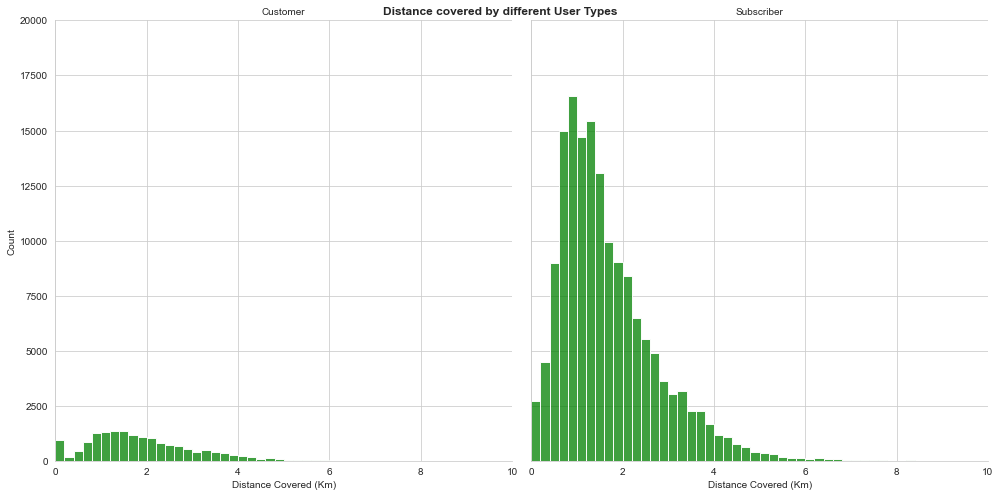

In [6]:
weekday = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

g = sb.FacetGrid(data=ford_polished,col='user_type',height=7,xlim=(0,10))
g.map(sb.histplot,'distance_km',color='g',bins=bins)
bins= np.arange(0,10+0.2,0.2)
g.set(xlabel=('Distance Covered (Km)'),ylim=(0,20000))
g.set_titles('{col_name}')
plt.suptitle('Distance covered by different User Types',fontweight='semibold');

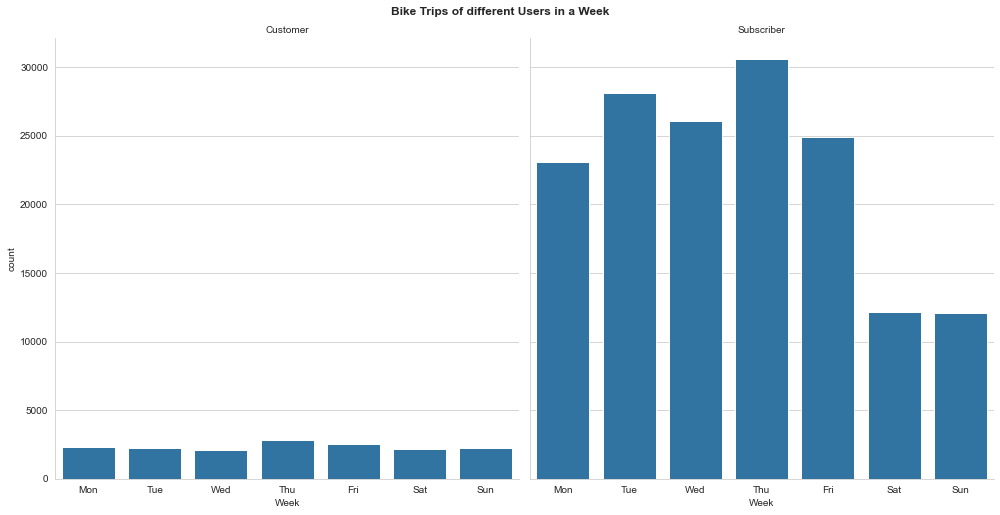

In [7]:
m = sb.FacetGrid(data=ford_polished,col='user_type',height=7)
m.map(sb.countplot,'start_time_weekday',order=weekday)
m.set(xlabel=('Week'))
m.set_titles('{col_name}');
plt.suptitle('Bike Trips of different Users in a Week',fontsize=12,fontweight='semibold',y=1.015);

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The relationship of the Distance Covered and the Duration with other features were the standouts. It showed that people covered a great distance with the bikes without wasting the time of Customers or the Subscribers. We were also able to see the relation with several age groups with millenials being the ones with the most distance covered and with most time spent on the service.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I noticed the count of rider per day in respect to the User types. Most Subscribers use their bike rides between Monday to Friday while the Customers have a low spread through out the week and it brought the assumption of customers being tourists or people out of town trying to navigate the Bay Area.

## Distance Covered by Subscribers and Customers during each day of the week
In this figure, We reduce the data to 30 minutes and below per ride to reduce the number of outliers in the data to be able to communicate the findings at an average level. We then look into the distance of the user types in the dataset.Firstly, the subscribers are being analysed and as we have noticed throughout the investigation,**They use this commute majorly at the start of the weekday from 7am to 9am and 4pm to 6pm peaking on Thursday at 5pm till the end of the weekday** which shows that most of the subscribers are people on the daily grind. Lastly, the cutsomers; From their heatmap, **it also fall between that line of a 9-5 but there also a bit of movement between 10am to 5pm on the weekends, peaking on Saturday around 1pm.** From this analysis, customers might still fall in the line of the 9-5 jobs but tourists are also involved in the business.

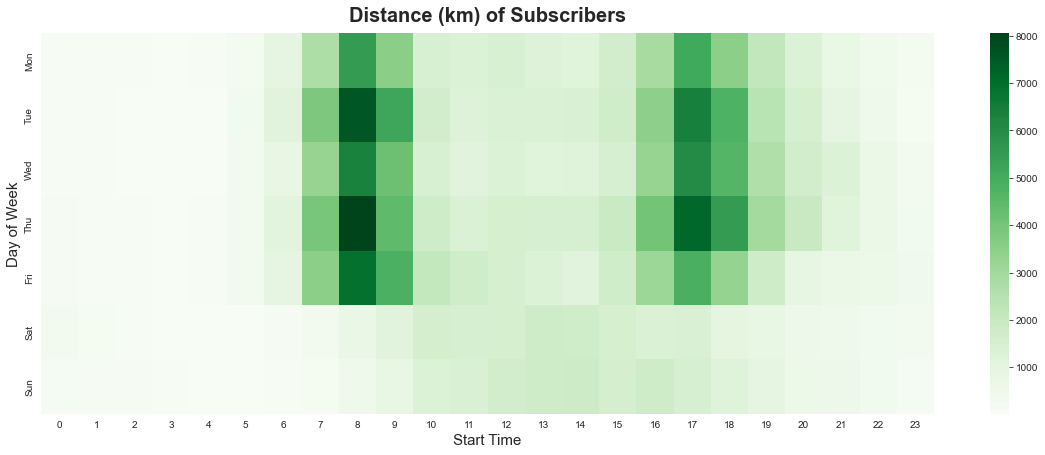

In [8]:
# Minutes of Rides from 30 minutes and below to remove outliers
data = ford_polished.query('duration_min < 30')
data_subscriber = ford_polished.query('user_type == "Subscriber"')
data_subscriber=  pd.pivot_table(data_subscriber, values="distance_km",index=["start_time_weekday"], columns=["start_time_hour"], fill_value=0,aggfunc='sum').reindex(weekday)
f,ax = plt.subplots(figsize=(20,7))
sb.heatmap(data_subscriber,ax=ax,cmap='Greens')
plt.title('Distance (km) of Subscribers',fontsize=20,fontweight='semibold',y=1.015)
plt.xlabel('Start Time',fontsize=15)
plt.ylabel('Day of Week',fontsize=15);

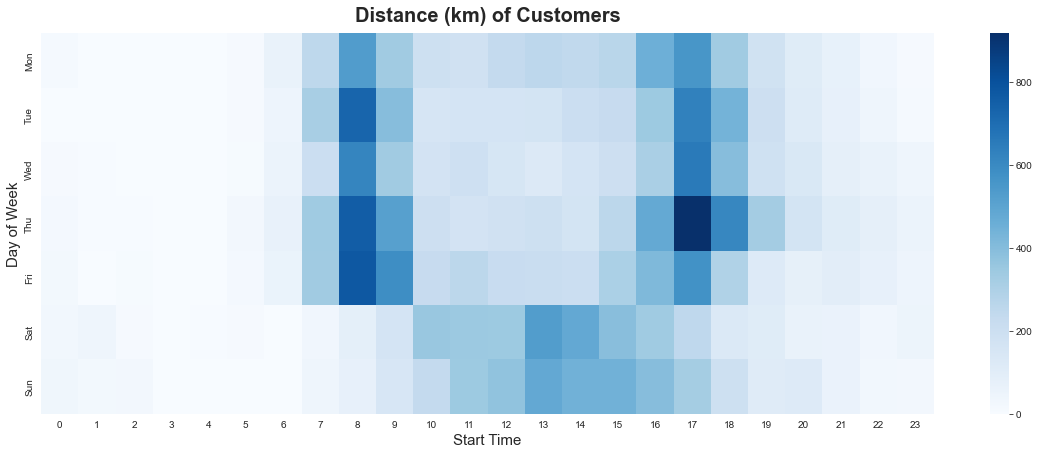

In [9]:
data_customer = ford_polished.query('user_type == "Customer"')
data_customer=  pd.pivot_table(data_customer, values="distance_km",index=["start_time_weekday"], columns=["start_time_hour"], fill_value=0,aggfunc='sum').reindex(weekday)
f,ax = plt.subplots(figsize=(20,7))
sb.heatmap(data_customer,ax=ax,cmap='Blues')
plt.title('Distance (km) of Customers',fontsize=20,fontweight='semibold',y=1.015)
plt.xlabel('Start Time',fontsize=15)
plt.ylabel('Day of Week',fontsize=15);

## Conclusions
>In the race between vehicles and trains, this project is a wise choice. Here are some of its advantages: 
>
>* Environmentally sustainable, cost-effective, and lifestyle-friendly.
>* Subscribers, or daily commuters, gain from a healthy transportation option.
>* Customers (such as visitors, students, etc.) have a flexible yet environmentally friendly alternative for exploring the city.
>* Accessible and affordable transit for all socioeconomic groups

[NbConvertApp] Converting notebook FordGoBike_slide_deck.ipynb to slides
[NbConvertApp] Writing 820131 bytes to FordGoBike_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\HP\Desktop\sample_project\env\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\HP\Desktop\sample_project\env\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\HP\Desktop\sample_project\env\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\HP\Desktop\sample_project\env\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\HP\Desktop\sample_project\env\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in co